In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import networkx as nx
import math 
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1.2
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['xtick.major.width'] = 3
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 3
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['xtick.minor.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 6
mpl.rcParams['ytick.minor.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 6
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['font.family'] = 'sans-serif'
cm_colors = plt.get_cmap('Set2')


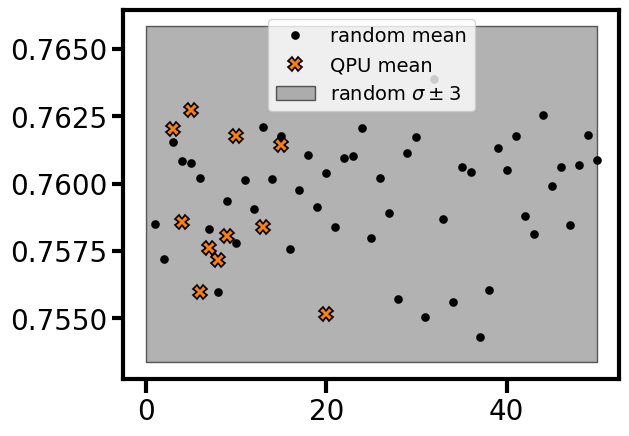

In [3]:
backend = "ibm_fez"
nq = 25
p = 10
sec = 0
results = np.load(f"./Data/{backend}/{nq}_FC.npy", allow_pickle=True).item()
delta=list(results["postprocessing"].keys())[0]
n_cases = 50
shots = len(results["postprocessing"][delta][p][sec]["results"][:,1])
rand_data = results["random"]["results"][:,1]
rand_mean = []
fig, ax = plt.subplots()

np.random.seed(1)
rand_data = results["random"]["results"][:,1]
for i in range(n_cases):
    np.random.shuffle(rand_data)
    ax.plot([i+1], np.mean(rand_data[:shots]), marker="o", linewidth=0, color="black")
    rand_mean.append(np.mean(rand_data[:shots]))
ax.plot([], [], marker="o", linewidth=0, color="black", label="random mean")

rand_mean = np.array(rand_mean)
y1 = rand_mean.mean()
y2 = 3*rand_mean.std()
ax.plot(list(results["postprocessing"][delta].keys()), [results["postprocessing"][delta][p][sec]["r"] for p in results["ps"]], marker="X", linewidth=0, markersize=10, markeredgecolor="black", label="QPU mean", color="tab:orange")

ax.fill_between([0, n_cases], [y1-y2,y1-y2], [y1+y2,y1+y2], color="grey", alpha=0.6, edgecolor="black", label=r"random $\sigma \pm 3$")
# ax.set_ylim(0.7,0.94)
ax.legend()
fig.savefig(f"./Figures/FC/sampling_{nq}_{backend}_{p}.pdf", bbox_inches="tight", transparent=True)


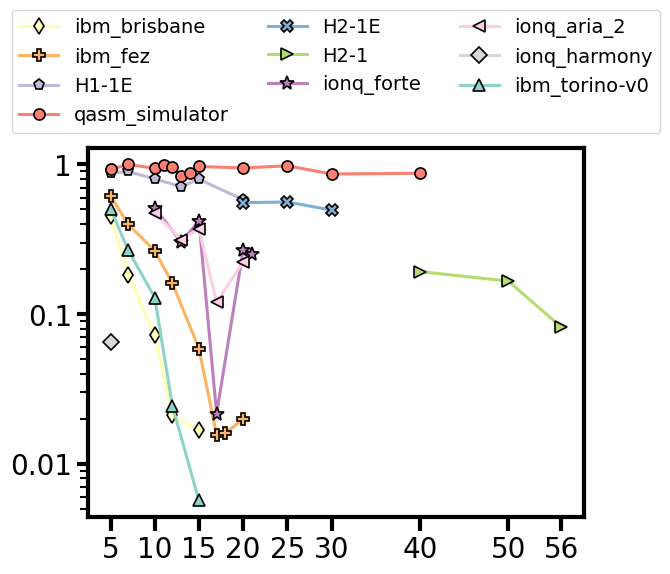

In [21]:
colors = plt.get_cmap("Set3")
prop = "r"
case = ""
nqs = {"ionq_forte":[10,13,15,17,20,21], "ibm_brisbane":[5,7,10,12,14,15,17,20], "ibm_fez":[5,7,10,12,15,17,18,20,22,25], "ibm_torino":[5,7,10,12,15,17,20,30,40], "ionq_harmony":[5,7,10],
       "H1-1E":[5,7,10,13,15,20],"H2-1E":[20,25,30],"qasm_simulator":[5,7,10,11,12,13,14,15,20,25],"ionq_aria_2":[10,13,15,17,20], "random":[5,7,10,11,12,13,14,15,16,17,20,25,30,35], "H2-1":[40, 50, 56]}
colors = {"ionq_forte":colors(9), "ibm_torino":colors(0), "ibm_brisbane":colors(1), "H1-1E":colors(2), "qasm_simulator":colors(3), "H2-1E":colors(4), "ibm_fez":colors(5), "H2-1":colors(6), "ionq_aria_2":colors(7), "ionq_harmony":colors(8), "ibm_marrakesh":colors(10)}
markers = {"ionq_forte":"*","ibm_torino":"^", "ibm_brisbane":"d", "H1-1E":"p", "qasm_simulator":"o", "H2-1E":"X", "random":".", "ibm_fez":"P", "H2-1":">", "ionq_aria_2":"<", "ionq_harmony":"D", "ibm_marrakesh":"."}
res_hpc = np.load(f"./Data/LR_HPC_WMC_B.npy", allow_pickle=True).item()
r = {}
backends = ["ibm_brisbane","ibm_fez", "H1-1E","qasm_simulator", "H2-1E", "H2-1", "ionq_forte", "ionq_aria_2", "ionq_harmony", "ibm_torino"]
r_hpc = []
for backend_name in backends:
    r_max = []
    for nq in nqs[backend_name]:
        results= np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
        postprocessing = results["postprocessing"+case]
        postprocessing_random = results["random"+case]
        shots = sum(list(results["samples"][results["Deltas"][0]][results["ps"][0]].values()))
        rand_data = []
        for v, c in zip(postprocessing_random["results"][:,1],postprocessing_random["results"][:,2]):
            rand_data += int(c) * [v]
        rand_data = np.array(rand_data)
        secs_rand = 10
        div_rand = len(rand_data)//secs_rand
        rand_mean = np.array([np.mean(rand_data[i*div_rand:(i+1)*div_rand]) for i in range(secs_rand)])
        rand_mean = []
        np.random.seed(1)
        for i in range(100):
            np.random.shuffle(rand_data)
            rand_mean.append(np.mean(rand_data[:shots]))
        rand_mean = np.array(rand_mean)
        y1 = rand_mean.mean()
        y2 = 3*rand_mean.std()
        deltas = results["Deltas"]
        ps = results["ps"]
        sections = results["sections"]
        r_max_nq = np.max([max([postprocessing[deltas[0]][p][i]["r"] for i in range(sections)]) for p in ps])
        r_max.append(((r_max_nq - (y1+y2))/(1-(y1+y2))))
        if backend_name == "ibm_torino" and nq in [30, 40]:
            r_max_nq = res_hpc[nq][0]["objective"]["r"]
            r_hpc.append(((r_max_nq - (y1+y2))/(1-(y1+y2))))
    r[backend_name] = r_max
    
r["qasm_simulator"] += r_hpc
nqs["qasm_simulator"] += [30,40]
fig, ax = plt.subplots()
for backend_name in backends:
    ax.plot([nqs[backend_name][ni] for ni, ri in enumerate(r[backend_name]) if ri > 0], [ri for ni, ri in enumerate(r[backend_name]) if ri > 0], marker=markers[backend_name], markeredgecolor="black", label=backend_name if backend_name != "ibm_torino" else "ibm_torino-v0", color=colors[backend_name], markersize=10 if backend_name=="ionq_forte" else 8)

ax.set_xticks([5,10,15,20,25,30,40,50,56])
ax.set_yscale("log")
ax.set_yticks([0.01,0.1, 1])
ax.legend(loc="upper center", bbox_to_anchor=(0.5,1.4), ncol=3)

ax.set_yticklabels([0.01,0.1, 1])
fig.savefig(f"./Figures/FC/r_vs_rand{case}_legend.pdf", bbox_inches="tight", transparent=True)


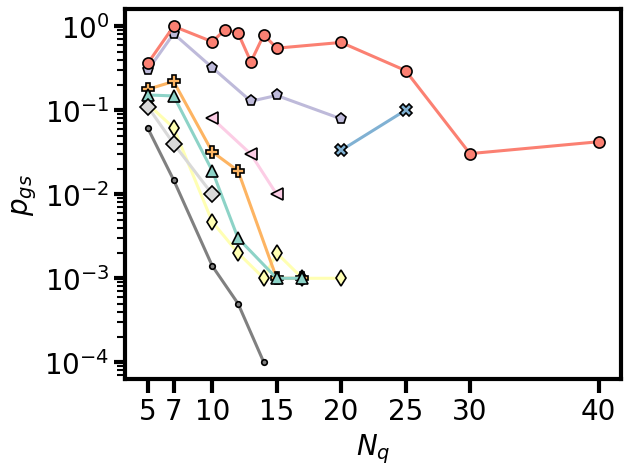

In [23]:
colors = plt.get_cmap("Set3")
prop = "probability"
case = ""
nqs = {"ionq_forte":[10,13,15,17,20,21], "ibm_brisbane":[5,7,10,12,14,15,17,20], "ibm_fez":[5,7,10,12,15,17,18,20,22,25], "ibm_torino":[5,7,10,12,15,17,20,30,40], "ionq_harmony":[5,7,10],
       "H1-1E":[5,7,10,13,15,20],"H2-1E":[20,25,30],"qasm_simulator":[5,7,10,11,12,13,14,15,20,25],"ionq_aria_2":[10,13,15,17,20], "random":[5,7,10,11,12,13,14,15,16,17,20,25,30,35], "H2-1":[40, 50, 56]}
colors = {"ibm_torino":colors(0), "ibm_brisbane":colors(1), "H1-1E":colors(2), "qasm_simulator":colors(3), "H2-1E":colors(4), "ibm_fez":colors(5), "H2-1":colors(6), "ionq_aria_2":colors(7), "ionq_harmony":colors(8), "random":"gray"}
markers = {"ibm_torino":"^", "ibm_brisbane":"d", "H1-1E":"p", "qasm_simulator":"o", "H2-1E":"X", "random":".", "ibm_fez":"P", "H2-1":">", "ionq_aria_2":"<", "ionq_harmony":"D"}

r = {}
backends = ["ibm_brisbane", "ibm_fez", "ibm_torino", "H1-1E", "H2-1E", "ionq_aria_2","ionq_harmony", "qasm_simulator"]

for backend_name in backends:
    r_max = []
    r_random = []
    for nq in nqs[backend_name]:
        results_brisbane = np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
        postprocessing = results_brisbane["postprocessing"+case]
        postprocessing_random = results_brisbane["random"+case]
        deltas = results_brisbane["Deltas"]
        ps = results_brisbane["ps"]
        sections = results_brisbane["sections"]
        # plt.plot([max([postprocessing[deltas[0]][p][i]["r"] for i in range(sections)]) for p in ps])
        r_max.append(np.max([max([postprocessing[deltas[0]][p][i][prop] for i in range(sections)]) for p in ps]))#- postprocessing_random[prop])
        r_random.append(postprocessing_random[prop])
    r[backend_name] = r_max
    if backend_name == "ibm_brisbane":
        r["random"] = np.copy(r_random)
        nqs["random"] = nqs["ibm_brisbane"]

r["qasm_simulator"] += [res_hpc[nq][0]["probability"] for nq in [30,40]]
nqs["qasm_simulator"] += [30,40]
fig, ax = plt.subplots()
for backend_name in backends+["random"]:
    ax.plot([nqs[backend_name][ni] for ni, ri in enumerate(r[backend_name]) if ri > 0], [ri for ri in r[backend_name] if ri > 0], marker=markers[backend_name], markeredgecolor="black", markersize=8, label=backend_name, color=colors[backend_name])

# ax.plot([5,20], [2/2**nq for nq in [5,20]], color="black", linestyle="--", label="random")
ax.set_xticks([5,7,10,15,20,25,30,40])
ylabel={"r":r"$r - r_{rand}$", "probability":r"$p_{gs}$"}
ax.set_ylabel(ylabel[prop])
ax.set_xlabel(r"$N_q$")
# ax.set_ylim(0,0.2)
# ax.legend(fontsize=11)
ax.set_yscale("log")
fig.savefig(f"./Figures/FC/{prop}_vs_rand_{case}.pdf", bbox_inches="tight", transparent=True)


QPU: ibm_brisbane | r = 0.713
QPU: ibm_torino | r = 0.711
QPU: ibm_fez | r = 0.726
QPU: ibm_marrakesh | r = 0.74
QPU: H1-1E | r = 0.941
QPU: ionq_aria_2 | r = 0.831
QPU: qasm_simulator | r = 0.991
QPU: ionq_forte | r = 0.844


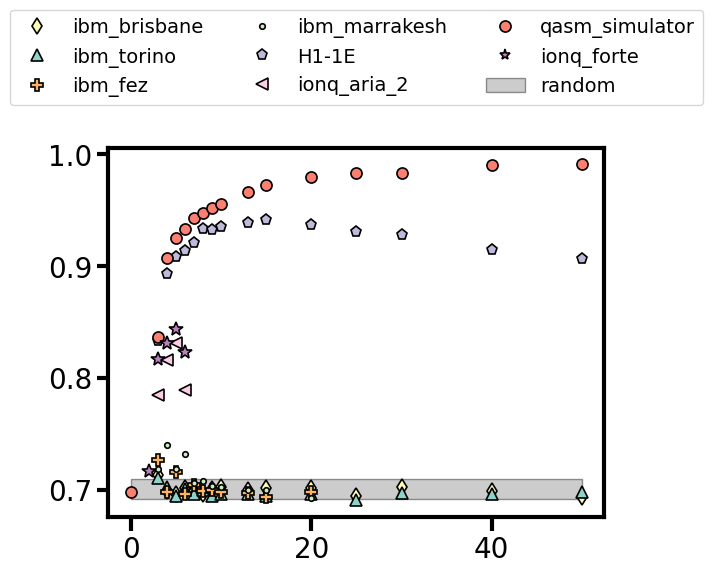

In [38]:
# Set the number of qubits for the experiment
nq = 15

# Load a colormap for visualization
colors = plt.get_cmap("Set3")

# Define property and case name
prop = "r"
case = ""

# Assign colors to each backend for plotting
colors = {
    "ibm_marrakesh": colors(10), "ibm_torino": colors(0), "ibm_brisbane": colors(1),
    "H1-1E": colors(2), "qasm_simulator": colors(3), "H2-1E": colors(4),
    "ibm_fez": colors(5), "H2-1": colors(6), "ionq_aria_2": colors(7),
    "ionq_harmony": colors(8), "ionq_forte": colors(9)
}

# Define marker styles for different backends
markers = {
    "ibm_marrakesh": ".", "ibm_torino": "^", "ibm_brisbane": "d",
    "H1-1E": "p", "qasm_simulator": "o", "H2-1E": "X", "random": ".",
    "ibm_fez": "P", "H2-1": ">", "ionq_aria_2": "<", "ionq_harmony": "D",
    "ionq_forte": "*"
}

# Create figure and axis for plotting
fig, ax = plt.subplots()

# List of backends to analyze
backends = ["ibm_brisbane", "ibm_torino", "ibm_fez", "ibm_marrakesh", 
            "H1-1E", "ionq_aria_2", "qasm_simulator", "ionq_forte"]

# Iterate over each backend
for nn, backend_name in enumerate(backends):
    # Load the results for the given backend and qubit size
    results = np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
    
    # Extract parameterized circuit depths and sections
    ps = results["ps"]
    sections = results["sections"]
    
    # Iterate over different delta values
    for nn1, delta in enumerate(results["Deltas"]):
        best_yp = 0  # Initialize best performance metric
        
        # Iterate over different sections to find the best result
        for i in results["postprocessing" + case][delta][ps[0]].keys():
            ypi = [results["postprocessing" + case][delta][p][i]["r"] for p in ps]  # Extract performance metrics
            
            # Update best performance if a higher value is found
            if np.max(ypi) > best_yp:
                yp = ypi
                best_yp = max(ypi)
        
        # Print best performance result for debugging
        print(f"QPU: {backend_name} | r = {round(best_yp, 3)}")

        # Plot results for the backend
        ax.plot(
            [ps[nn] for nn, yi in enumerate(yp) if yi > 0],  # X-axis: Parameterized layers
            [yi for yi in yp if yi > 0],  # Y-axis: Performance metric (r)
            marker=markers[backend_name], markeredgecolor="black",
            color=colors[backend_name], linewidth=0, 
            markersize=8 if backend_name != "ionq_forte" else 10
        )

        # Add legend entry for the backend
        ax.plot([], [], marker=markers[backend_name], markeredgecolor="black", 
                color=colors[backend_name], linewidth=0, label=backend_name, markersize=8)

# Process and analyze random sampling data for baseline comparison
rand_data = []
for v, c in zip(results["random" + case]["results"][:, 1], results["random" + case]["results"][:, 2]):
    rand_data += int(c) * [v]  # Expand data based on frequency

# Convert list to numpy array
rand_data = np.array(rand_data)

# Partition random data into sections
secs_rand = 10
div_rand = len(rand_data) // secs_rand
rand_mean = np.array([np.mean(rand_data[i * div_rand:(i + 1) * div_rand]) for i in range(secs_rand)])

# Perform random resampling for uncertainty estimation
rand_mean = []
for i in range(100):
    np.random.shuffle(rand_data)  # Shuffle data
    rand_mean.append(np.mean(rand_data[:1000]))  # Compute mean over subset

# Convert to numpy array
rand_mean = np.array(rand_mean)

# Compute mean and standard deviation of random baseline
y1 = rand_mean.mean()
y2 = 3 * rand_mean.std()

# Add shaded region representing the random performance range
ax.fill_between([0, 50], [y1 - y2, y1 - y2], [y1 + y2, y1 + y2], color="grey", alpha=0.4, edgecolor="black", label="random")

# Add legend to the plot
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.4), ncol=3)

# Save the figure as a PDF file
fig.savefig(f"./Figures/FC/{nq}_FC_random_{prop}_{case}_corr.pdf", bbox_inches="tight", transparent=True)


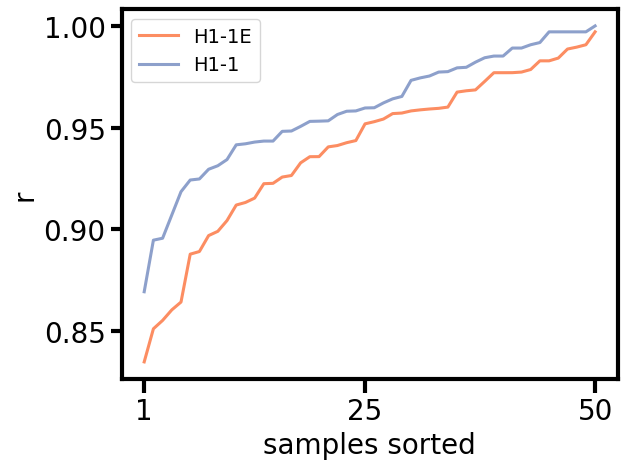

In [19]:
h1_1_results = np.load(f"./Data/H1-1/WMC_Nq20_p20.npy", allow_pickle=True).item()
h1_1E_results = np.load(f"./Data/H1-1E/WMC_Nq20_p20.npy", allow_pickle=True).item()
colors = plt.get_cmap("Set2")
fig, ax = plt.subplots()
y = []
for i in h1_1E_results["postprocessing"][0.4][20][0]["results"]:
    y += int(i[2]) * [i[1]]
x = np.linspace(0,1, len(y))
y1 = []
for i in h1_1_results["h1-1"]["results"]["results"]:
    y1 += int(i[2]) * [i[1]]
x1 = np.linspace(0,1, len(y1))
ax.plot(range(1,51), np.sort(y), label="H1-1E", color=colors(1))
ax.plot(range(1,51), np.sort(y1), label="H1-1", color=colors(2))
ax.legend()
ax.set_xlabel("samples sorted")
ax.set_ylabel("r")
ax.set_xticks([1,25,50])
fig.savefig("./Figures/FC/h1_1_vs_h1_1E.pdf", bbox_inches="tight", transparent=True)

In [4]:
import numpy as np
for nq in [5,7,10,13,15,17,20]:
    res = np.load(f"./Data/H1-1E/{nq}_FC.npy", allow_pickle=True).item()
    res.pop("ids")
    np.save(f"./Data/H1-1E/{nq}_FC.npy", res)


In [ ]:
from scipy.optimize import minimize
colors = plt.get_cmap("Set3")
# def obj_fun(error, k, y_random, y_opt, N_edges, p):
#     y = y_random + (y_opt - y_random) / (1 + (N_edges*p*error/2) ** (k))
#     return y
def obj_fun(error, k, eta, N_edges, p):
    y = y_random + (1 - np.exp(-eta*p)) / (1 + (N_edges*p*error/2) ** (k))
    return y
def fun_ideal(x, y_opt, y_random):
    y = 1 - np.exp(-x[0]*p)
    y_real = y_opt - y_random
    return np.mean((y_real - y)**2)
    
def func(x, nq, ps, y_real, y_random, y_opt):
    error = x[0]
    k = x[1]
    y = np.array([obj_fun(error, k, y_random, y_opt[p], nq, p) for p in ps])
    return np.mean((y - y_real) ** 2)

fig, ax = plt.subplots()
backend_name = "H1-1E"
errors = []
ks = []
nqs = [5,7,10,13,15,17,20]
for i, nq in enumerate(nqs):
    prop = "r"
    graph = "FC"
    results = np.load(f"./Data/{backend_name}/{nq}_{graph}.npy", allow_pickle=True).item()
    ps = results["ps"][:-2]
    results_opt = np.load(f"./Data/qasm_simulator/{nq}_{graph}.npy", allow_pickle=True).item()
    N_edges = results["G"].number_of_edges()
    y_random = results["random"]["r"]
    y_opt = {p:results_opt["postprocessing"][results_opt["Deltas"][0]][p][0][prop] for p in ps}
    y = np.array([results["postprocessing"][results["Deltas"][0]][p][0][prop] for p in ps])
    x0 = [0.001, 0.47641244]
    res = minimize(func, x0, args=(N_edges, ps, y, y_random, y_opt), method="Nelder-Mead")
    ks.append(res.x[1])
    errors.append(res.x[0])
    plt.plot(ps, y, marker="o", linewidth=0, label="real", color=colors(i))
    plt.plot(ps, [y_opt[p] for p in ps], marker="o", linestyle="--", label="ideal", color=colors(i))

    plt.plot(ps, [obj_fun(res.x[0], res.x[1], y_random, y_opt[p], N_edges, p) for p in ps], color=colors(i))


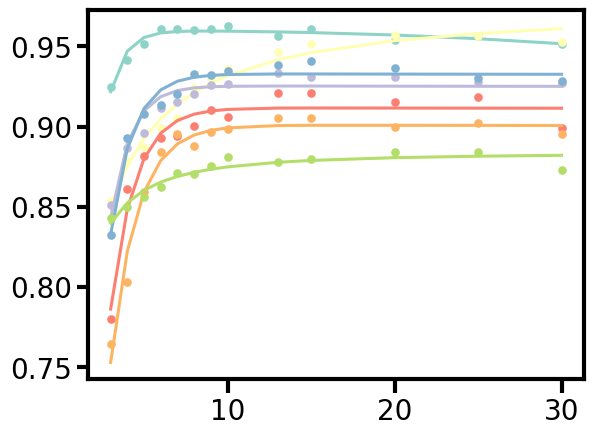

In [314]:
from scipy.optimize import minimize
colors = plt.get_cmap("Set3")
# def obj_fun(error, k, y_random, y_opt, N_edges, p):
#     y = y_random + (y_opt - y_random) / (1 + (N_edges*p*error/2) ** (k))
#     return y
def obj_fun(error, k, eta, A, N_edges, p):
    y = y_random + (A - np.exp(-eta*p)) / (1 + error*(N_edges*p*1e-3/2) ** (k))
    return y
def fun_ideal(x, y_opt, y_random, ps):
    eta = x[0]
    A = x[1]
    y = [A  - np.exp(-eta*p) for p in ps]
    y_real = (y_opt - y_random)/(1-y_random)
    return np.mean((y_real - y)**2)
    
def func(x, nq, ps, y_real):
    error = x[0]
    k = x[1]
    eta = x[2]
    A = x[3]
    y = np.array([obj_fun(error, k, eta, A, nq, p) for p in ps])
    return np.mean((y - y_real) ** 2)

fig, ax = plt.subplots()
backend_name = "H1-1E"
errors = []
ks = []
nqs = [5,7,10,13,15,17,20]
for i, nq in enumerate(nqs):
    prop = "r"
    graph = "FC"
    results = np.load(f"./Data/{backend_name}/{nq}_{graph}.npy", allow_pickle=True).item()
    ps = results["ps"][:-2]
    results_opt = np.load(f"./Data/qasm_simulator/{nq}_{graph}.npy", allow_pickle=True).item()
    N_edges = results["G"].number_of_edges()
    y_random = results["random"]["r"]
    y_opt = np.array([results_opt["postprocessing"][results_opt["Deltas"][0]][p][0][prop] for p in ps])
    y = np.array([results["postprocessing"][results["Deltas"][0]][p][0][prop] for p in ps])
    x0 = [0.01, 0.1, 0.8, 0.3]
    res_opt = minimize(fun_ideal, [1, 0.2], args=(y_opt, y_random, ps), method="Nelder-Mead")
    eta = res_opt.x[0]
    A = res_opt.x[1]
    res = minimize(func, x0, args=(N_edges, ps, y), method="Nelder-Mead")
    ks.append(res.x[1])
    errors.append(res.x[0])
    eta = res.x[2]
    A = res.x[3]
    plt.plot(ps, y, marker="o", linewidth=0, label="real", color=colors(i))
    # plt.plot(ps, (y_opt-y_random)/(1-y_random), marker="o", linestyle="--", label="ideal", color=colors(i))
    # plt.plot(ps, [res_opt.x[1] *(1 - np.exp(-eta*p)) for p in ps], label="ideal", color=colors(i))
    plt.plot(ps, [obj_fun(res.x[0], res.x[1], eta, A, N_edges, p) for p in ps], color=colors(i))


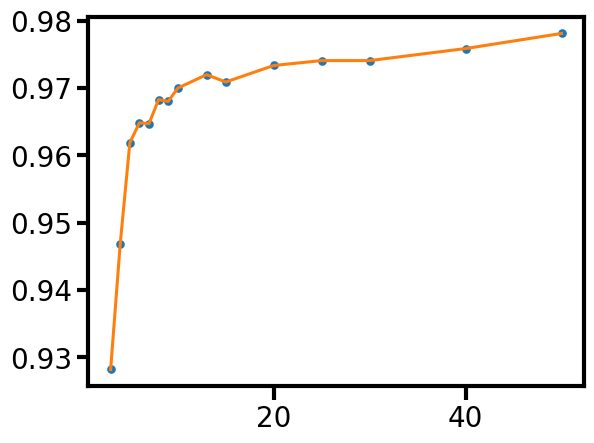

In [123]:
error = 1e-10
k = 1.4
C = 5
backend_name = "H1-1E"
nq = 5
prop = "r"
results = np.load(f"./Data/{backend_name}/{nq}_FC.npy", allow_pickle=True).item()
results_opt = np.load(f"./Data/qasm_simulator/{nq}_FC.npy", allow_pickle=True).item()

y = np.array([results["postprocessing"][results["Deltas"][0]][p][0][prop] for p in results["ps"]])
y_random = results["random"][prop]
y_opt = {p:results_opt["postprocessing"][results["Deltas"][0]][p][0][prop] for p in results["ps"]}
plt.plot(results["ps"], [y_opt[p] for p in results["ps"]], marker="o", linewidth=0, label="real")
plt.plot(results["ps"], [obj_fun(error, k, C, y_random, y_opt[p],nq,p) for p in results["ps"]])